In [1]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


- EPS
- Net Margin (%)
- Dvd. Yield (%)
- ROE (%)

In [2]:
from bs4 import BeautifulSoup
import requests

url = "https://marketdata.set.or.th/mkt/sectorquotation.do?sector=SET50&language=en&country=US"
page = requests.get(url)
data = page.content
soup = BeautifulSoup(data)
SET50 = {}

for i,link in enumerate(soup.find_all('td', style="text-align: left;")):
    for sublink in link.find_all('a'):
        html = sublink.get('href')
        if html[:14] == "stockquotation":
            name = html.split("stockquotation.do?symbol=")[1].split("&sso")[0]
            SET50[name] = {}
            SET50[name]["PE"] = {}
            SET50[name]["EPS"] = {}
            SET50[name]["ProfitMargin"] = {}
            SET50[name]["ROE"] = {}
            SET50[name]["Dividend_Yield"]= {}
        else:
            pass

//anaconda/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file //anaconda/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [3]:
def ProCut(s):
    check = False
    ans = []
    s1 = ""
    for i in s:
        if i == ">":
            check = True
            s1 = ""
        elif i == "&" and s1 != "" and s1 != "&nbsp;":
            ans.append(s1)
            s1 = ""
            check = False
        elif check:
            s1 += i
        else:
            continue
    return ans

In [4]:
def getPE(stockname):
    url = "https://www.set.or.th/set/companyhighlight.do?symbol="+stockname+"&ssoPageId=5&language=en&country=US"
    page = requests.get(url)
    data = page.content
    soup = BeautifulSoup(data)
    test = data.find('''<td style="text-align:left;" height="15">P/E</td>''')
    PE = data[test+50:test+250]
    return ProCut(PE)
    
def getEPS(stockname):
    url = "https://www.set.or.th/set/companyhighlight.do?symbol="+stockname+"&ssoPageId=5&language=en&country=US"
    page = requests.get(url)
    data = page.content
    soup = BeautifulSoup(data)
    test = data.find('''<td style="text-align:left;" height="15">EPS (Baht)</td>''')
    EPS = data[test+50:test+200]
    return ProCut(EPS)

def getNPM(stockname):
    url = "https://www.set.or.th/set/companyhighlight.do?symbol="+stockname+"&ssoPageId=5&language=en&country=US"
    page = requests.get(url)
    data = page.content
    soup = BeautifulSoup(data)
    test = data.find('''<td style="text-align:left;" height="15">Net Profit Margin(%)</td>''')
    NPM = data[test+50:test+200]
    return ProCut(NPM)

def getROE(stockname):
    url = "https://www.set.or.th/set/companyhighlight.do?symbol="+ stockname +"&ssoPageId=5&language=en&country=US"
    page = requests.get(url)
    data = page.content
    soup = BeautifulSoup(data)
    test = data.find('''<td style="text-align:left;" height="15">ROE(%)</td>''')
    NPM = data[test+50:test+200]
    return ProCut(NPM)

def getDVD(stockname):
    url = "https://www.set.or.th/set/companyhighlight.do?symbol="+ stockname +"&ssoPageId=5&language=en&country=US"
    page = requests.get(url)
    data = page.content
    soup = BeautifulSoup(data)
    test = data.find('''<td style="text-align:left;" height="15">Dvd. Yield(%)</td>''')
    NPM = data[test+50:test+250]
    return ProCut(NPM)




In [5]:
for a in SET50:
    print a
    FullPE = getPE(a)
    FullEPS = getEPS(a)
    FullNPM = getNPM(a)
    FullROE = getROE(a)
    FullDVD = getDVD(a)
    year = ["2016","2015","2014","2013"]
    for i in range(len(FullEPS)):
        SET50[a]["Dividend_Yield"][year[i]] = FullDVD[(-i-1)]
    for i in range(len(FullEPS)):
        SET50[a]["PE"][year[i]] = FullPE[(-i-1)]
    for i in range(len(FullEPS)):
        SET50[a]["EPS"][year[i]] = FullEPS[(-i-1)]
    for i in range(len(FullNPM)):
        SET50[a]["ProfitMargin"][year[i]] = FullNPM[(-i-1)]
    for i in range(len(FullNPM)):
        SET50[a]["ROE"][year[i]] = FullROE[(-i-1)]

TU
BA
CPN
ADVANC
TPIPL
TOP
GLOBAL
BH
IRPC
CPF
TMB
SCC
THAI
DTAC
ROBINS
WHA
PTG
BCP
BEM
LH
SCB
AOT
CENTEL
CPALL
CK
TCAP
BBL
MINT
PTTGC
TRUE
PTTEP
BANPU
HMPRO
EGCO
BLA
KTB
GLOW
KCE
PSH
PTT
CBG
BTS
IVL
KBANK
KKP
INTUCH
GPSC
BDMS
DELTA
SPRC


In [6]:
SET50

{'ADVANC': {'Dividend_Yield': {'2013': '4.84',
   '2014': '7.89',
   '2015': '8.84',
   '2016': '5.79'},
  'EPS': {'2013': '12.20', '2014': '12.12', '2015': '13.17', '2016': '10.31'},
  'PE': {'2013': '20.89', '2014': '12.06', '2015': '12.49', '2016': '16.87'},
  'ProfitMargin': {'2013': '25.25',
   '2014': '24.02',
   '2015': '25.10',
   '2016': '20.08'},
  'ROE': {'2013': '81.42', '2014': '77.91', '2015': '82.32', '2016': '67.44'}},
 'AOT': {'Dividend_Yield': {'2013': '1.21',
   '2014': '1.89',
   '2015': '1.72',
   '2016': '1.72'},
  'EPS': {'2013': '11.44', '2014': '8.55', '2015': '13.11', '2016': '13.70'},
  'PE': {'2013': '32.97', '2014': '26.39', '2015': '29.05', '2016': '28.35'},
  'ProfitMargin': {'2013': '36.37',
   '2014': '30.73',
   '2015': '40.92',
   '2016': '37.08'},
  'ROE': {'2013': '19.32', '2014': '12.96', '2015': '18.22', '2016': '17.03'}},
 'BA': {'Dividend_Yield': {'2014': '0.87', '2015': '3.08', '2016': '3.71'},
  'EPS': {'2014': '0.21', '2015': '0.86', '2016': 

In [7]:
StockComponent = {}
check = []
filterYear = []
count = 0

for i in SET50:
    try:
        print 'Stock:',i
        StockDf = pd.DataFrame(SET50[i])
        if len(StockDf.index) < 4:
            filterYear.append(i)
        print StockDf
    except:
        check.append(i)
    print '==================================='
    
for i in filterYear:
    SET50.pop(i)

Stock: TU
     Dividend_Yield   EPS     PE ProfitMargin    ROE
2013           1.58  2.49  20.73         2.49   7.43
2014           3.13  1.10  15.65         4.14  12.24
2015           3.00  1.11  19.61         4.17  11.86
2016           2.99  1.10  19.16         3.87  11.80
Stock: BA
     Dividend_Yield   EPS     PE ProfitMargin   ROE
2014           0.87  0.21  24.81         1.56  2.17
2015           3.08  0.86  22.23         7.07  6.39
2016           3.71  0.84  23.99         6.44  5.63
Stock: CPN
     Dividend_Yield   EPS     PE ProfitMargin    ROE
2013           1.21  1.42  28.22        28.10  20.45
2014           1.38  1.63  27.08        29.50  18.93
2015           1.23  1.76  28.50        29.60  18.12
2016           1.46  2.06  27.67        30.70  18.87
Stock: ADVANC
     Dividend_Yield    EPS     PE ProfitMargin    ROE
2013           4.84  12.20  20.89        25.25  81.42
2014           7.89  12.12  12.06        24.02  77.91
2015           8.84  13.17  12.49        25.10  82.32
2

In [9]:
setDf = pd.DataFrame(SET50)
setDf

,ADVANC,AOT,BANPU,BBL,BCP,BDMS,BH,BLA,BTS,CENTEL,...,SCB,SCC,TCAP,THAI,TMB,TOP,TPIPL,TRUE,TU,WHA
Dividend_Yield,"{u'2015': u'8.84', u'2014': u'7.89', u'2016': ...","{u'2015': u'1.72', u'2014': u'1.89', u'2016': ...","{u'2015': u'2.72', u'2014': u'7.50', u'2016': ...","{u'2015': u'4.08', u'2014': u'4.26', u'2016': ...","{u'2015': u'5.97', u'2014': u'3.03', u'2016': ...","{u'2015': u'1.13', u'2014': u'1.03', u'2016': ...","{u'2015': u'1.30', u'2014': u'0.92', u'2016': ...","{u'2015': u'1.21', u'2014': u'0.89', u'2016': ...","{u'2015': u'7.95', u'2014': u'6.59', u'2016': ...","{u'2015': u'1.26', u'2014': u'0.91', u'2016': ...",...,"{u'2015': u'3.61', u'2014': u'5.02', u'2016': ...","{u'2015': u'3.23', u'2014': u'2.72', u'2016': ...","{u'2015': u'4.09', u'2014': u'4.54', u'2016': ...","{u'2015': u'N/A', u'2014': u'N/A', u'2016': u'...","{u'2015': u'2.85', u'2014': u'2.48', u'2016': ...","{u'2015': u'3.74', u'2014': u'1.76', u'2016': ...","{u'2015': u'0.81', u'2014': u'0.95', u'2016': ...","{u'2015': u'0.07', u'2014': u'N/A', u'2016': u...","{u'2015': u'3.00', u'2014': u'3.13', u'2016': ...","{u'2015': u'N/A', u'2014': u'N/A', u'2016': u'..."
EPS,"{u'2015': u'13.17', u'2014': u'12.12', u'2016'...","{u'2015': u'13.11', u'2014': u'8.55', u'2016':...","{u'2015': u'-0.59', u'2014': u'1.04', u'2016':...","{u'2015': u'17.91', u'2014': u'19.03', u'2016'...","{u'2015': u'3.01', u'2014': u'0.52', u'2016': ...","{u'2015': u'0.51', u'2014': u'0.48', u'2016': ...","{u'2015': u'4.72', u'2014': u'3.75', u'2016': ...","{u'2015': u'2.41', u'2014': u'1.57', u'2016': ...","{u'2015': u'0.25', u'2014': u'1.08', u'2016': ...","{u'2015': u'1.24', u'2014': u'0.88', u'2016': ...",...,"{u'2015': u'13.88', u'2014': u'15.69', u'2016'...","{u'2015': u'37.83', u'2014': u'28.01', u'2016'...","{u'2015': u'4.61', u'2014': u'4.24', u'2016': ...","{u'2015': u'-5.99', u'2014': u'-7.15', u'2016'...","{u'2015': u'0.21', u'2014': u'0.22', u'2016': ...","{u'2015': u'5.97', u'2014': u'-1.97', u'2016':...","{u'2015': u'0.02', u'2014': u'0.07', u'2016': ...","{u'2015': u'0.18', u'2014': u'0.07', u'2016': ...","{u'2015': u'1.11', u'2014': u'1.10', u'2016': ...","{u'2015': u'0.16', u'2014': u'1.02', u'2016': ..."
PE,"{u'2015': u'12.49', u'2014': u'12.06', u'2016'...","{u'2015': u'29.05', u'2014': u'26.39', u'2016'...","{u'2015': u'N/A', u'2014': u'4,980.12', u'2016...","{u'2015': u'9.75', u'2014': u'8.26', u'2016': ...","{u'2015': u'13.07', u'2014': u'25.62', u'2016'...","{u'2015': u'42.30', u'2014': u'44.53', u'2016'...","{u'2015': u'37.01', u'2014': u'45.91', u'2016'...","{u'2015': u'16.74', u'2014': u'23.06', u'2016'...","{u'2015': u'57.94', u'2014': u'20.91', u'2016'...","{u'2015': u'30.92', u'2014': u'32.10', u'2016'...",...,"{u'2015': u'11.10', u'2014': u'8.53', u'2016':...","{u'2015': u'10.81', u'2014': u'12.90', u'2016'...","{u'2015': u'9.03', u'2014': u'7.82', u'2016': ...","{u'2015': u'7.59', u'2014': u'N/A', u'2016': u...","{u'2015': u'10.56', u'2014': u'10.93', u'2016'...","{u'2015': u'7.69', u'2014': u'68.93', u'2016':...","{u'2015': u'224.17', u'2014': u'N/A', u'2016':...","{u'2015': u'N/A', u'2014': u'27.49', u'2016': ...","{u'2015': u'19.61', u'2014': u'15.65', u'2016'...","{u'2015': u'18.58', u'2014': u'37.84', u'2016'..."
ProfitMargin,"{u'2015': u'25.10', u'2014': u'24.02', u'2016'...","{u'2015': u'40.92', u'2014': u'30.73', u'2016'...","{u'2015': u'-1.74', u'2014': u'2.52', u'2016':...","{u'2015': u'23.86', u'2014': u'26.14', u'2016'...","{u'2015': u'2.73', u'2014': u'0.38', u'2016': ...","{u'2015': u'12.15', u'2014': u'12.74', u'2016'...","{u'2015': u'19.15', u'2014': u'17.16', u'2016'...","{u'2015': u'7.40', u'2014': u'4.33', u'2016': ...","{u'2015': u'32.57', u'2014': u'52.86', u'2016'...","{u'2015': u'8.69', u'2014': u'6.43', u'2016': ...",...,"{u'2015': u'28.59', u'2014': u'32.16', u'2016'...","{u'2015': u'9.87', u'2014': u'6.68', u'2016': ...","{u'2015': u'8.93', u'2014': u'7.79', u'2016': ...","{u'2015': u'-6.78', u'2014': u'-7.65', u'2016'...","{u'

## Graph displaying relationship between price and financial ratio

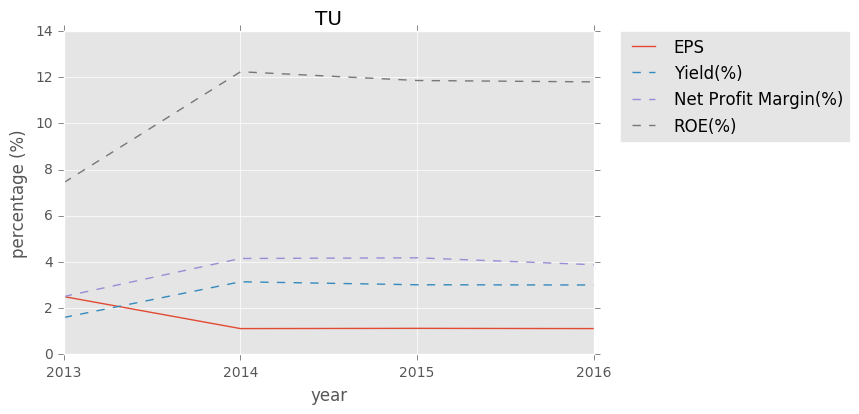

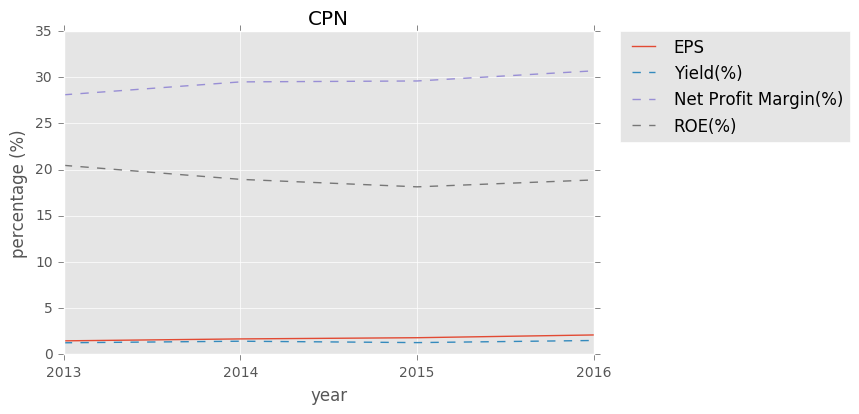

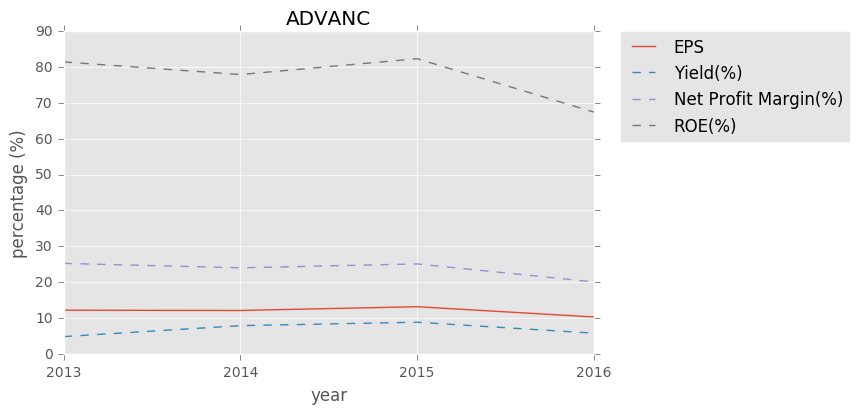

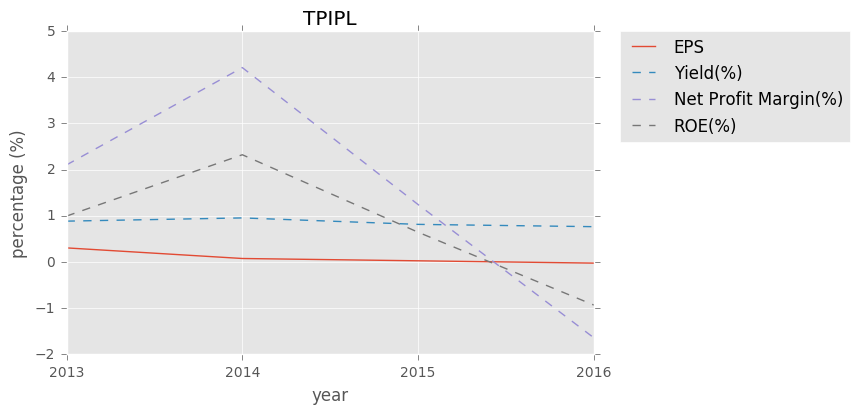

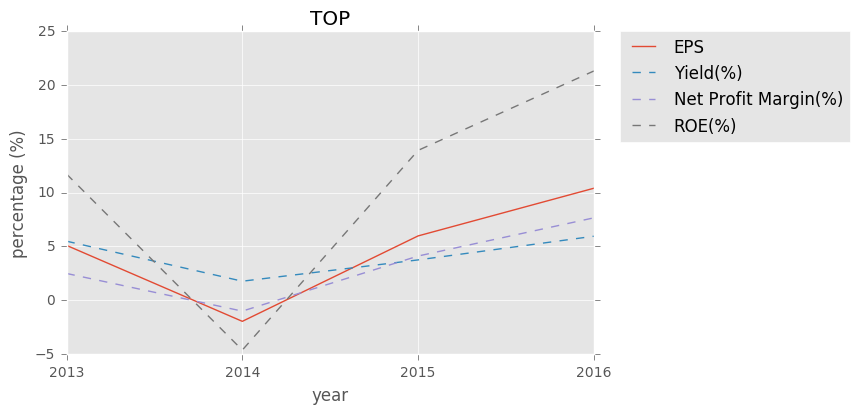

In [217]:
def plotGraph(quote):
    array=[]
    sorted_yield = sorted(setDf[quote][0].items())
    sorted_eps = sorted(setDf[quote][1].items())
    sorted_pe = sorted(setDf[quote][2].items())
    sorted_npm = sorted(setDf[quote][3].items())
    sorted_roe = sorted(setDf[quote][4].items())

    year,dvd = zip(*sorted_yield)
    year,eps = zip(*sorted_eps)
    year,pe = zip(*sorted_pe)
    year,npm = zip(*sorted_npm)
    year,roe = zip(*sorted_roe)
    
    plt.title(quote)
    plt.plot(eps,label='EPS')
    plt.plot(dvd,'--',label='Yield(%)')
    plt.plot(npm,'--',label='Net Profit Margin(%)')
    plt.plot(roe,'--',label='ROE(%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.xticks([0,1,2,3],year)
    plt.ylabel('percentage (%)')
    plt.xlabel('year')
    plt.show()
        
for index,i in enumerate(SET50):
    if index < 5:
        plotGraph(i)

## Train the data

In [139]:
# def trainData(quote, trainYear=np.sort(year)[:int(len(year)*.8)]):
#     for i in trainYear:
#         cEPS = setDf[quote]['EPS'][i]
#         cYield = setDf[quote]['Dividend_Yield'][i]
#         cMargin = setDf[quote]['ProfitMargin'][i]
#         cROE = setDf[quote]['ROE'][i]
#         print 'EPS',cEPS
#         print 'Yield',cYield
#         print 'Net Margin',cMargin
#         print 'ROE',cROE
    
# print trainData('BDMS')

In [292]:
yield_df = pd.DataFrame(setDf['AOT'][0].items(), columns=['year','Yield'])
eps_df = pd.DataFrame(setDf['AOT'][1].items(), columns=['year','EPS'])
pe_df = pd.DataFrame(setDf['AOT'][2].items(), columns=['year','PE'])
npm_df = pd.DataFrame(setDf['AOT'][3].items(), columns=['year','Net Profit Margin'])
roe_df = pd.DataFrame(setDf['AOT'][4].items(), columns=['year','ROE'])

frames = [yield_df,eps_df,pe_df,npm_df,roe_df]
stock_df = pd.concat(frames)

stock_df

,EPS,Net Profit Margin,PE,ROE,Yield,year
0,NaN,NaN,NaN,NaN,1.72,2015
1,NaN,NaN,NaN,NaN,1.89,2014
2,NaN,NaN,NaN,NaN,1.72,2016
3,NaN,NaN,NaN,NaN,1.21,2013
0,13.11,NaN,NaN,NaN,NaN,2015
1,8.55,NaN,NaN,NaN,NaN,2014
2,13.70,NaN,NaN,NaN,NaN,2016
3,11.44,NaN,NaN,NaN,NaN,2013
0,NaN,NaN,29.05,NaN,NaN,2015
1,NaN,NaN,26.39,NaN,NaN,2014
